# Speech Processing - TD1

## Part 1: Qualitative analysis of audio files

**Question 1: In your opinion, why do we use this dataset?**

A1 - This dataset is one of the rare health and speech dataset available that presents those characteristics:
* All labels came from the diagnosis of clinicians;
* All parameters of speakers are equilibrate: age, gender (that reflect reality), control and depressed groups, education level;
* It has been recorded in real-life setting conditions in hospital, with laptop microphones;
* The language used in this dataset was Italian, a language pretty under-resourced;
* It can be easily re-used to perform classification task on speech features (like the authors did for depression in their article).

**Task 3: Plot a spectrogram (to see quality of audio signal)**

In [ ]:
# installation
!pip install -U praat-parselmouth
import parselmouth
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

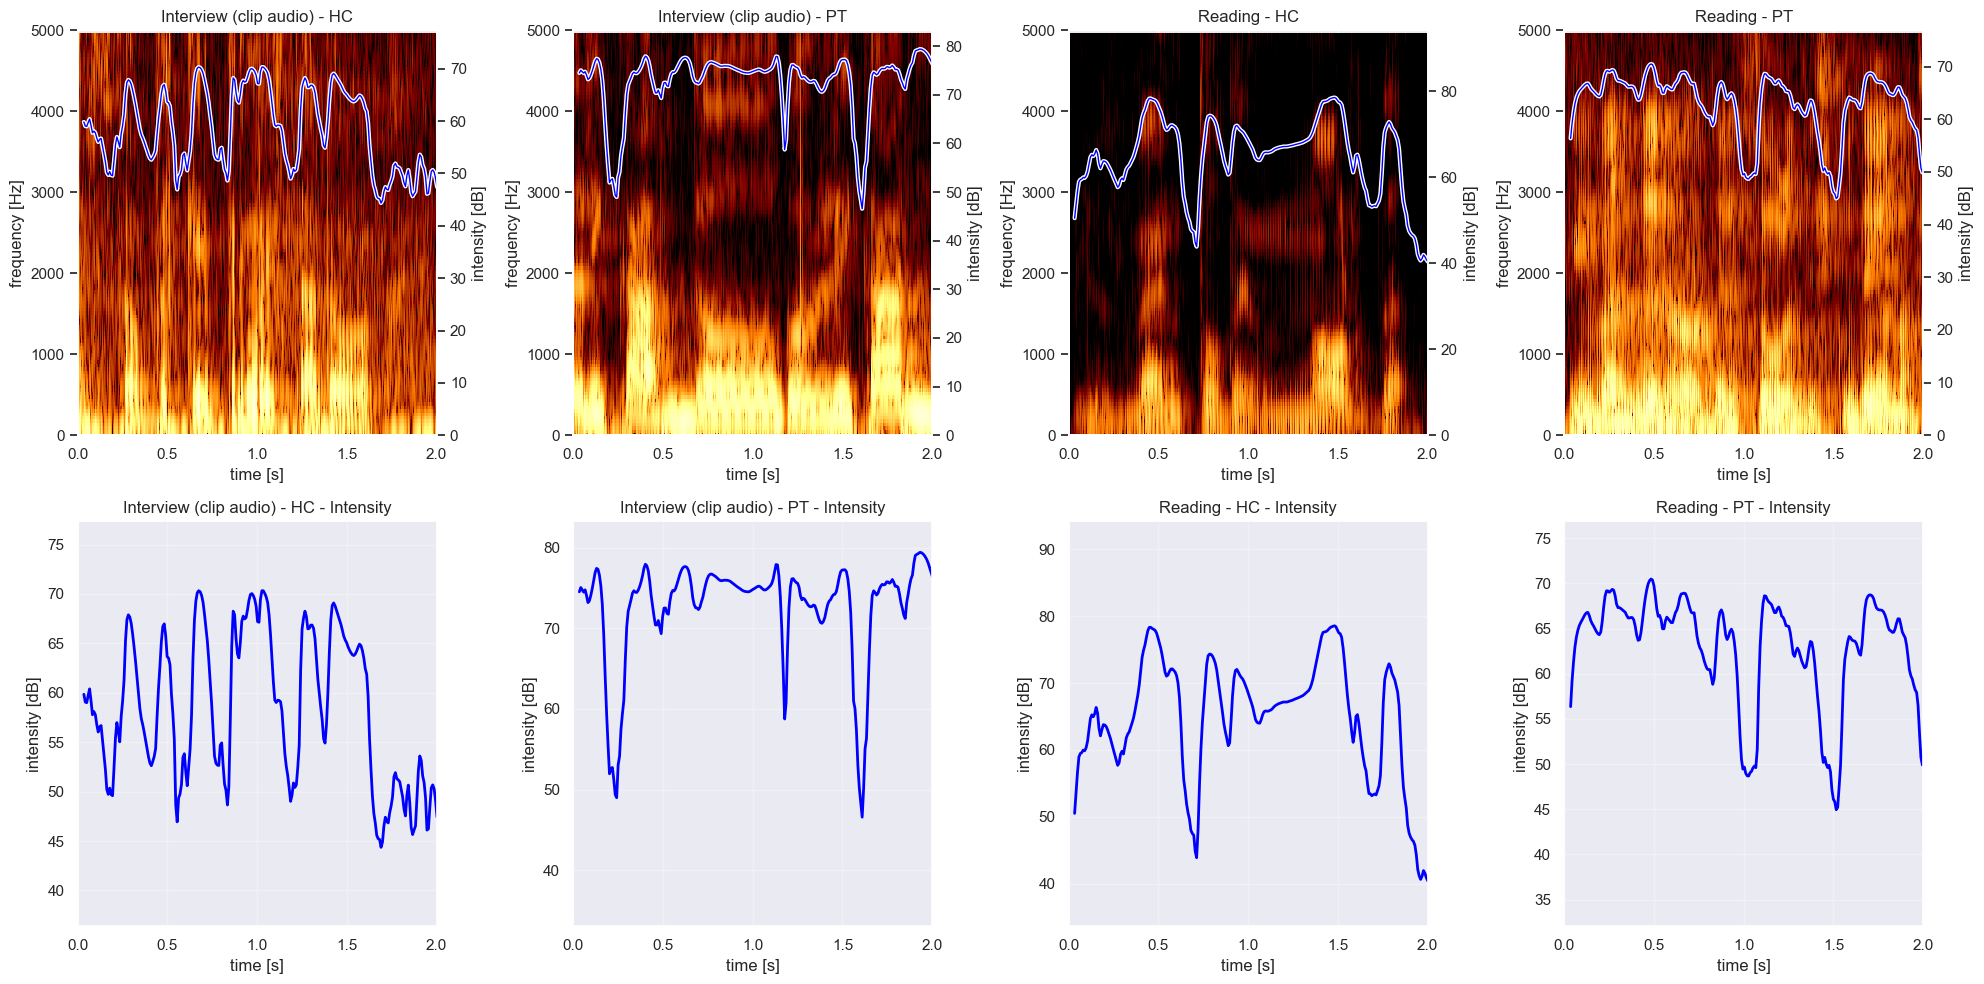

In [5]:
# Spectrogram
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity(intensity, color='w', linecolor='blue'):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color=color)
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1, color=linecolor)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

# List of audio file paths
audio_files = [
    r"C:\Users\Elise\Desktop\COURS\S9 (papapapaaaaa)\Speech Processing\Androids-Corpus\Androids-Corpus\Interview-Task\audio_clip\01_CF56_1\01_CF56_1_6.wav",
    r"C:\Users\Elise\Desktop\COURS\S9 (papapapaaaaa)\Speech Processing\Androids-Corpus\Androids-Corpus\Interview-Task\audio_clip\25_CF59_3\25_CF59_3_2.wav",
    r"C:\Users\Elise\Desktop\COURS\S9 (papapapaaaaa)\Speech Processing\Androids-Corpus\Androids-Corpus\Reading-Task\audio\HC\54_CM48_2.wav",
    r"C:\Users\Elise\Desktop\COURS\S9 (papapapaaaaa)\Speech Processing\Androids-Corpus\Androids-Corpus\Reading-Task\audio\PT\09_PM60_2.wav"
]

# Custom titles for each audio file
audio_titles = [
    "Interview (clip audio) - HC",
    "Interview (clip audio) - PT",
    "Reading - HC",
    "Reading - PT"
]

# Use seaborn's default style
sns.set()
plt.rcParams['figure.dpi'] = 100

# Create a figure with 2 rows and 4 columns (spectrogram + zoomed intensity for each file)
fig = plt.figure(figsize=(20, 10))

for idx, audio_file in enumerate(audio_files):
    try:
        # Load sound file
        snd = parselmouth.Sound(audio_file)
        intensity = snd.to_intensity()
        spectrogram = snd.to_spectrogram()
        
        # Spectrogram plot (top row)
        ax1 = plt.subplot(2, 4, idx + 1)
        draw_spectrogram(spectrogram)
        ax2 = ax1.twinx()
        draw_intensity(intensity)
        plt.xlim([snd.xmin, snd.xmax])
        plt.title(audio_titles[idx])
        # time window (2 sec):
        plt.xlim([0, 2])
        
        # Zoomed intensity plot (bottom row)
        ax3 = plt.subplot(2, 4, idx + 5)
        plt.plot(intensity.xs(), intensity.values.T, linewidth=2, color='blue')
        plt.xlabel("time [s]")
        plt.ylabel("intensity [dB]")
        plt.title(f"{audio_titles[idx]} - Intensity")
        plt.xlim([snd.xmin, snd.xmax])
        plt.grid(True, alpha=0.3)
        # time window (2 sec):
        plt.xlim([0, 2])
        
    except Exception as e:
        print(f"Error loading {audio_file}: {e}")

plt.tight_layout()
plt.show()

**Question 2: What are the characteristics of these audio files? (sampling rate, bitrate, duration, approximative Signal-to-Noise ratio?)**

In [ ]:
#Q2:
def signaltonoise(a, axis=0, ddof=0):
    """
    
    :param a: the speech waveform
    :param axis: the axis to compute the mean
    :param ddof: 
    :return: the signal-to-noise
    """
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)


def question_2():
    """
    Answer to question: retrieve all requiered informations from hc, pt and all files then compute avg, std, min, max of
    these variables. 
    :return: None
    """
    # Task 3
    root_hc = r'C:\Users\Cam\PycharmProjects\td_speech_processing\Androids-Corpus\Interview-Task\audio\HC'
    root_pt = r'C:\Users\Cam\PycharmProjects\td_speech_processing\Androids-Corpus\Interview-Task\audio\PT'

    filenames_hc = [f'{root_hc}/{f}' for f in listdir(root_hc) if isfile(join(root_hc, f))]
    filenames_pt = [f'{root_pt}/{f}' for f in listdir(root_pt) if isfile(join(root_pt, f))]

    all_files = filenames_hc + filenames_pt

    durations = []
    snrs = []
    sample_rates = []
    bitrates = []

    print("All filenames_hc")
    for file in filenames_hc:
        # Load audio
        SPEECH_WAVEFORM, SAMPLE_RATE = torchaudio.load(file)
        sample_rates.append(SAMPLE_RATE)
        snr = signaltonoise(SPEECH_WAVEFORM.numpy()[0])
        snrs.append(snr)
        duration = SPEECH_WAVEFORM.shape[1] / SAMPLE_RATE
        metadata = torchaudio.info(file)
        bitrate = metadata.sample_rate * metadata.bits_per_sample / 1000
        bitrates.append(bitrate)
        durations.append(duration)

    print(f"Sample rate: {set(sample_rates)}\n"
          f"Bitrate: {set(bitrates)}\n"
          f"Mean duration: {round(np.mean(durations), 3)}'s\n"
          f"Std duration: {round(np.std(durations), 3)}'s\n"
          f"Min duration: {round(np.min(durations), 3)}'s\n"
          f"Max duration: {round(np.max(durations), 3)}'s\n"
          f"Mean snr: {round(np.mean(snrs), 7)}'s\n"
          f"Std snr: {round(np.std(snrs), 7)}'s\n"
          f"Min snr: {round(np.min(snrs), 7)}'s\n"
          f"Max snr: {round(np.max(snrs), 7)}'s\n"
          )


    durations = []
    snrs = []
    sample_rates = []
    bitrates = []
    print("All filenames_pt")
    for file in filenames_pt:
        # Load audio
        SPEECH_WAVEFORM, SAMPLE_RATE = torchaudio.load(file)
        sample_rates.append(SAMPLE_RATE)
        snr = signaltonoise(SPEECH_WAVEFORM.numpy()[0])
        snrs.append(snr)
        duration = SPEECH_WAVEFORM.shape[1] / SAMPLE_RATE
        metadata = torchaudio.info(file)
        bitrate = metadata.sample_rate * metadata.bits_per_sample / 1000
        bitrates.append(bitrate)
        durations.append(duration)

    print(f"Sample rate: {set(sample_rates)}\n"
          f"Bitrate: {set(bitrates)}\n"
          f"Mean duration: {round(np.mean(durations), 3)}'s\n"
          f"Std duration: {round(np.std(durations), 3)}'s\n"
          f"Min duration: {round(np.min(durations), 3)}'s\n"
          f"Max duration: {round(np.max(durations), 3)}'s\n"
          f"Mean snr: {round(np.mean(snrs), 7)}'s\n"
          f"Std snr: {round(np.std(snrs), 7)}'s\n"
          f"Min snr: {round(np.min(snrs), 7)}'s\n"
          f"Max snr: {round(np.max(snrs), 7)}'s\n")

    durations = []
    snrs = []
    sample_rates = []
    bitrates = []
    print("All files")
    for file in all_files:
        # Load audio
        SPEECH_WAVEFORM, SAMPLE_RATE = torchaudio.load(file)
        sample_rates.append(SAMPLE_RATE)
        snr = signaltonoise(SPEECH_WAVEFORM.numpy()[0])
        snrs.append(snr)
        duration = SPEECH_WAVEFORM.shape[1] / SAMPLE_RATE
        metadata = torchaudio.info(file)
        bitrate = metadata.sample_rate * metadata.bits_per_sample / 1000
        bitrates.append(bitrate)
        durations.append(duration)

    print(f"Sample rate: {set(sample_rates)}\n"
          f"Bitrate: {set(bitrates)}\n"
          f"Mean duration: {round(np.mean(durations), 3)}'s\n"
          f"Std duration: {round(np.std(durations), 3)}'s\n"
          f"Min duration: {round(np.min(durations), 3)}'s\n"
          f"Max duration: {round(np.max(durations), 3)}'s\n"
          f"Mean snr: {round(np.mean(snrs), 7)}'s\n"
          f"Std snr: {round(np.std(snrs), 7)}'s\n"
          f"Min snr: {round(np.min(snrs), 7)}'s\n"
          f"Max snr: {round(np.max(snrs), 7)}'s\n")

**Question 3: What is the number of sample per speaker?**


A3 Given that there is normally only one sample in the reading and interview, the normal total number should be two samples per speaker. However, some speakers did not pass certain tests, so some speakers have only one sample or no sample at all. It is also worth noting that in the audio- clip file there are more samples per speaker, but we did not count them in the total because these samples are extracts from the sample already existing in the interview (only the participants' answers).

Outliers:

For the control group:

42 and 55 have only one sample

34, 35, 43 have no samples

For the patient group:

16, 18, 20, 23, 28, 29 and 70 have only one sample

30, 34, 39, 40, 45, 55, 60 and 63 have no sample

**Question 4: Are the differences between reading and spontaneous speech? Make a comparative table between the two types of speech.**

| features     | Reading     | Spontaneous   |
|--------------|-------------|---------------|
| types of speech   | controlled | spontaneous (natural) |
|   goal | subject reads a prepared text | subject speek without support (free speak) |
| fluency | good and controlled | hesitations |
| pros | easy to compare, repetable | phonetic particularities, diverse | 
| cons |  reading disorders | emotions inductions, exotic |
| mean duration | 50.2 s | 229.8 s |
| standard deviation | 10.2 s | 86.2 s|
| Min duration| 32.8 s | 70.6 s |
| Max duration| 84.1 s | 579.3 s |


**Question 5: Why the label of this dataset could be considered as more robust that the previous one (see article)?**

A5: The distinction between depressed and non-depressed speakers was made by professional psychiatrists and not through the administration of self-assessment questionnaires. This means that the data allows one to investigate depression detection, and not the prediction of scores obtained through questionnaires, known to be affected by multiple biases.

**Question 6: Is the dataset balanced? What will be the most relevant metric? How is it implemented in *sklearn*?**

**Q7. What are the features contained in the Android set? (cf. Interspeech article)**

A7: 

- Root Mean Square Energy (1 feature)
- Mel-Frequency Cepstral Coefficients (MFCC) (12 features)
- Fundamental Frequency (F0) (1 feature)
- Zero-Crossing Rate (1 feature)
- Voicing Probability (1 feature)
- Regression coefficients

In all, we are reaching a dimensionality D = 32.

**Question 8: Why do we need to scale the data?** 

A8: We should scale the features so we have comparable data which would facilitate optimization and generalization

**Question 9: Why do we use cross-validation?**

A9: Cross-validation is useful because it gives a robust and unbiased estimate of model performance. It helps to ensures reproducibility, and maximizes the use of scarce data. (à vérifier)